Notebook to experiment with showing the Pareto front in control parameter space.

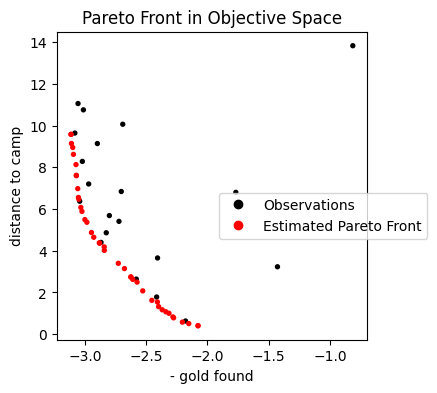

In [24]:
import ProcessOptimizer as po
from ProcessOptimizer.model_systems import get_model_system
from ProcessOptimizer import Optimizer

# Define the model system
gold_model_system = get_model_system("gold_map")
distance_model_system = get_model_system("distance_map")

space = distance_model_system.space

opt = Optimizer(space, n_initial_points=4, n_objectives=2)

for i in range(20):
    new_dig_site = opt.ask()
    gold_found = gold_model_system.get_score(new_dig_site)
    distance = distance_model_system.get_score(new_dig_site)
    result = opt.tell(new_dig_site, [gold_found, distance])

po.plot_Pareto(optimizer=opt, figsize = [4,4], objective_names=["- gold found", "distance to camp"], return_data=True);



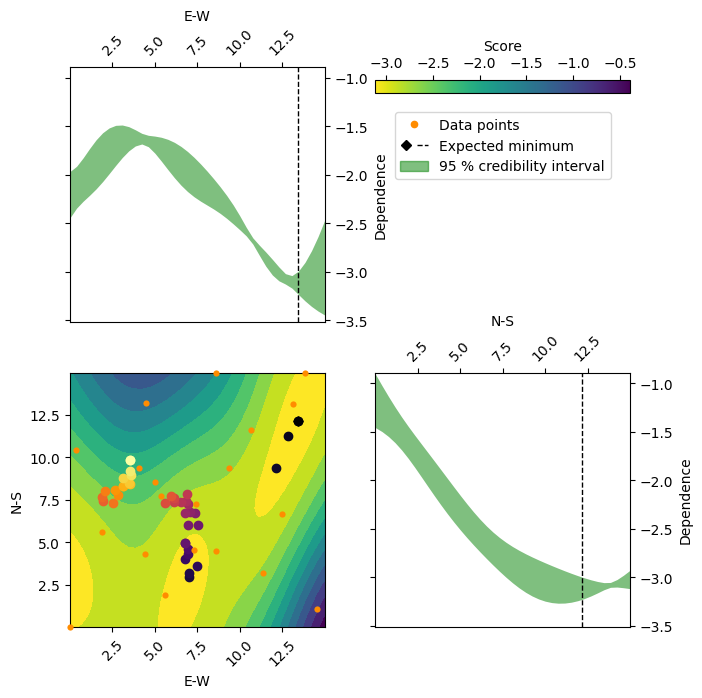

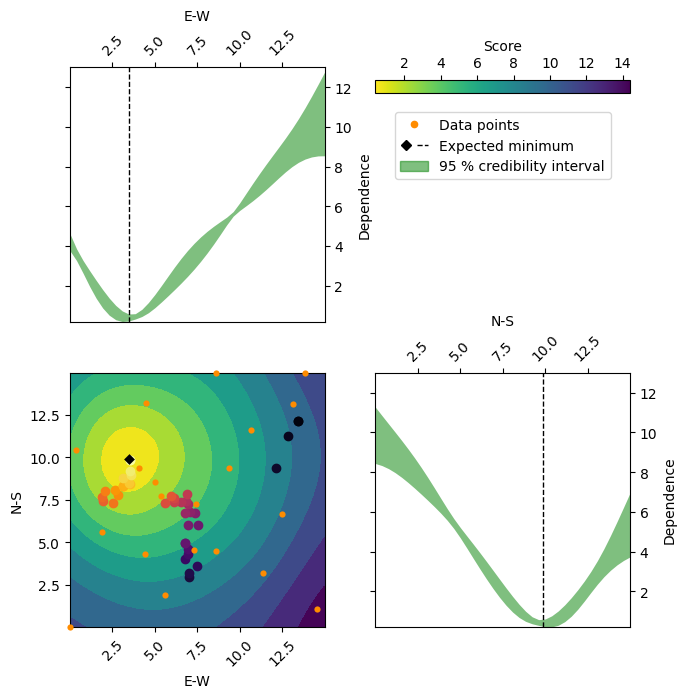

In [31]:
import numpy as np
import matplotlib
colormapl = "inferno"
colormap = matplotlib.colormaps[colormapl]
figure_list = []
pop, _, front = opt.NSGAII()
pop = np.asarray(pop)
pop = np.asarray(
    opt.space.inverse_transform(
        pop.reshape(len(pop), opt.space.transformed_n_dims)
    )
)
order = front.argsort(axis=0) # Sorting according to the objectives
pop = pop[order[:, 0]] # Sorting according to the first objective
colors = np.linspace(0, 1, len(pop))
colors = [colormap(c) for c in colors]
for n in range(len(result)):
    figure_list.append(po.plot_objective(
        result = result[n],
        pars = "expected_minimum",
        dimensions= ["E-W", "N-S"],
    ))
    for point, color in zip(pop,colors):
        figure_list[n][1][0].scatter(x=[point[0]], y=[point[1]], color=[color])

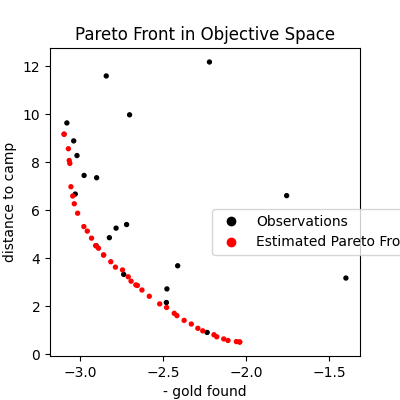

In [5]:
#ipympl is needed for the following cell to render. without ipympl, the user is still able to run po.plot_pareto(optimizer) but the plot will not be interactive.
%matplotlib widget
po.plot_Pareto(
    optimizer=opt,
    figsize = [4,4],
    objective_names=["- gold found", "distance to camp"],
    dimensions= ["E-W", "N-S"],
)